In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from mlxtend.plotting import plot_confusion_matrix

### Load data and split

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0.125,0.125,0.096774,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0.250,0.075,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0.000,0.100,0.032258,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0.125,0.025,0.064516,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0.250,0.000,0.161290,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125,0.050,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0.250,0.250,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,3
9997,0.125,0.075,0.129032,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
9998,0.125,0.100,0.161290,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
count_floors_pre_eq                       10000 non-null float64
age                                       10000 non-null float64
height                                    10000 non-null float64
L1                                        10000 non-null int64
L2                                        10000 non-null int64
F1                                        10000 non-null int64
F2                                        10000 non-null int64
F3                                        10000 non-null int64
F4                                        10000 non-null int64
has_superstructure_adobe_mud              10000 non-null int64
has_superstructure_mud_mortar_stone       10000 non-null int64
has_superstructure_stone_flag             10000 non-null int64
has_superstructure_cement_mortar_stone    10000 non-null int64
has_superstructure_mud_mortar_brick       10000 non-null int64
has_

In [5]:
df.shape

(10000, 21)

In [6]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [7]:
X.head()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.125,0.125,0.096774,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.250,0.075,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.000,0.100,0.032258,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0.125,0.025,0.064516,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.250,0.000,0.161290,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
y.head()

0    2
1    3
2    2
3    2
4    3
Name: damage_grade, dtype: int64

In [9]:
X.values, y.values

(array([[0.125     , 0.125     , 0.09677419, ..., 0.        , 0.        ,
         0.        ],
        [0.25      , 0.075     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.1       , 0.03225807, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.125     , 0.075     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.1       , 0.16129032, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.2       , 0.06451613, ..., 0.        , 0.        ,
         0.        ]]), array([2, 3, 2, ..., 2, 3, 2], dtype=int64))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [11]:
X_train.shape

(8000, 20)

In [12]:
X_test.shape

(2000, 20)

### Using Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=1000, random_state=0)

In [14]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_predict = lr.predict(X_test)

In [16]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

### Logistic Model Evaluation

In [17]:
cm = confusion_matrix(y_test,y_predict)

In [18]:
cm

array([[  36,  152,    0],
       [  29, 1081,   17],
       [   8,  664,   13]], dtype=int64)

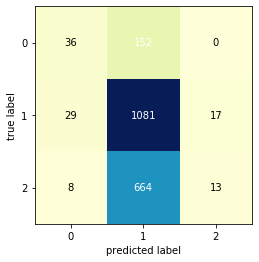

In [19]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

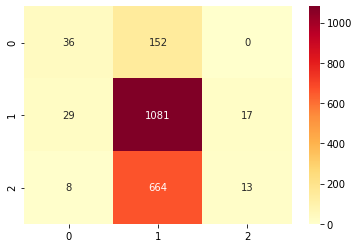

In [20]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [21]:
lr.score(X_test,y_test)

0.565

In [22]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.49      0.19      0.28       188
           2       0.57      0.96      0.71      1127
           3       0.43      0.02      0.04       685

    accuracy                           0.56      2000
   macro avg       0.50      0.39      0.34      2000
weighted avg       0.52      0.56      0.44      2000



### Using Support Vector Classifier

In [23]:
svc = SVC(random_state=0)

In [24]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
y_predict = svc.predict(X_test)

In [26]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

### SVC Model Evaluation

In [27]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[  40,  148,    0],
       [  25, 1085,   17],
       [   2,  660,   23]], dtype=int64)

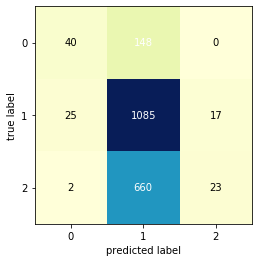

In [28]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

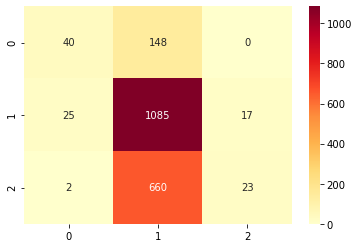

In [29]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [30]:
svc.score(X_test,y_test)

0.574

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.60      0.21      0.31       188
           2       0.57      0.96      0.72      1127
           3       0.57      0.03      0.06       685

    accuracy                           0.57      2000
   macro avg       0.58      0.40      0.37      2000
weighted avg       0.58      0.57      0.46      2000



### Decision Tree Classifier

In [32]:
dtc = DecisionTreeClassifier(random_state=0)

In [33]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
dtc.feature_importances_

array([0.05796541, 0.28648841, 0.21388278, 0.02514152, 0.03572107,
       0.03417773, 0.02597218, 0.02198481, 0.00454159, 0.04154283,
       0.070587  , 0.01888015, 0.01455523, 0.0231051 , 0.02334507,
       0.04525467, 0.02138465, 0.01730146, 0.0058175 , 0.01235084])

In [35]:
y_predict = dtc.predict(X_test)

In [36]:
y_predict

array([2, 2, 3, ..., 2, 2, 3], dtype=int64)

### Decision Tree evaluation

In [37]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 59, 110,  19],
       [ 81, 809, 237],
       [ 22, 460, 203]], dtype=int64)

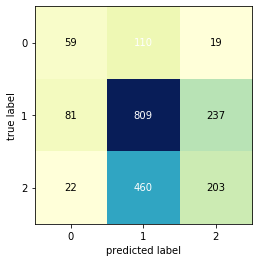

In [38]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

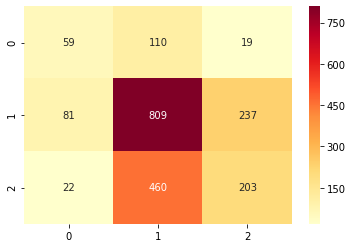

In [39]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [40]:
dtc.score(X_test,y_test)

0.5355

In [41]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.36      0.31      0.34       188
           2       0.59      0.72      0.65      1127
           3       0.44      0.30      0.35       685

    accuracy                           0.54      2000
   macro avg       0.46      0.44      0.45      2000
weighted avg       0.52      0.54      0.52      2000



### K-Nearest Neighbour

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y_predict = knn.predict(X_test)

In [45]:
y_predict

array([2, 2, 2, ..., 2, 2, 3], dtype=int64)

### KNN Evaluation

In [46]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 56, 111,  21],
       [ 65, 780, 282],
       [ 16, 452, 217]], dtype=int64)

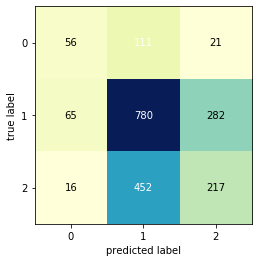

In [47]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

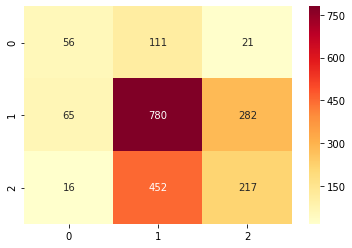

In [48]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [49]:
knn.score(X_test,y_test)

0.5265

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.41      0.30      0.34       188
           2       0.58      0.69      0.63      1127
           3       0.42      0.32      0.36       685

    accuracy                           0.53      2000
   macro avg       0.47      0.44      0.45      2000
weighted avg       0.51      0.53      0.51      2000



### Random Forest

In [51]:
rfc = RandomForestClassifier(random_state=0)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
y_predict = rfc.predict(X_test)

In [54]:
y_predict

array([2, 2, 3, ..., 2, 2, 3], dtype=int64)

### Random forest evaluation

In [55]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 48, 122,  18],
       [ 58, 820, 249],
       [ 12, 457, 216]], dtype=int64)

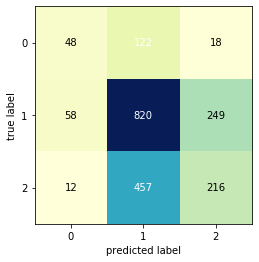

In [56]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

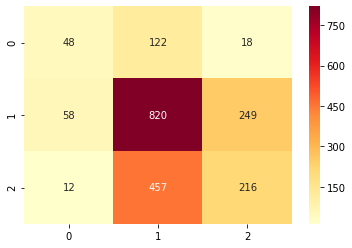

In [57]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [58]:
rfc.score(X_test,y_test)

0.542

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.41      0.26      0.31       188
           2       0.59      0.73      0.65      1127
           3       0.45      0.32      0.37       685

    accuracy                           0.54      2000
   macro avg       0.48      0.43      0.44      2000
weighted avg       0.52      0.54      0.52      2000



### Naive Bayes

In [60]:
nbc = MultinomialNB()

In [61]:
nbc.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
y_predict = nbc.predict(X_test)

In [63]:
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

### Naive Bayes evaluation

In [64]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[  50,  138,    0],
       [  57, 1052,   18],
       [   6,  666,   13]], dtype=int64)

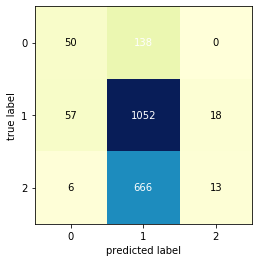

In [65]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

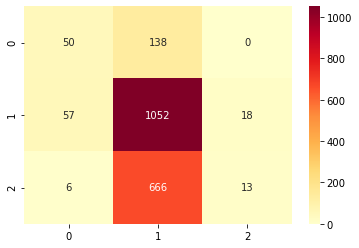

In [66]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [67]:
nbc.score(X_test,y_test)

0.5575

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.44      0.27      0.33       188
           2       0.57      0.93      0.71      1127
           3       0.42      0.02      0.04       685

    accuracy                           0.56      2000
   macro avg       0.48      0.41      0.36      2000
weighted avg       0.50      0.56      0.44      2000



### Gradient Boosting Classifier

In [69]:
gbc = GradientBoostingClassifier(random_state=0)

In [70]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
y_predict = gbc.predict(X_test)

In [72]:
y_predict

array([2, 2, 3, ..., 2, 2, 3], dtype=int64)

### Gradient Boosting Evaluation

In [73]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 49, 135,   4],
       [ 29, 983, 115],
       [  7, 535, 143]], dtype=int64)

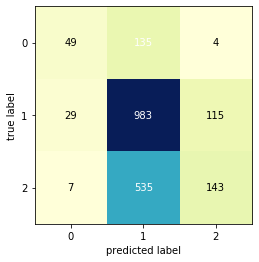

In [74]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

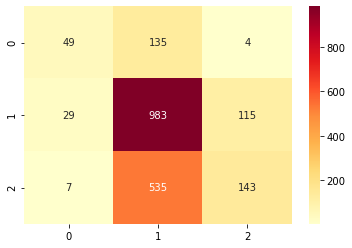

In [75]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [76]:
gbc.score(X_test,y_test)

0.5875

In [77]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.58      0.26      0.36       188
           2       0.59      0.87      0.71      1127
           3       0.55      0.21      0.30       685

    accuracy                           0.59      2000
   macro avg       0.57      0.45      0.46      2000
weighted avg       0.58      0.59      0.54      2000



### Histogram-Based Gradient Boosting

In [78]:
hgb = HistGradientBoostingClassifier(random_state=0)

In [79]:
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=0, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [80]:
y_predict = hgb.predict(X_test)

In [81]:
y_predict

array([2, 2, 3, ..., 2, 2, 3], dtype=int64)

### Histogram Gradient evaluation

In [82]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 48, 128,  12],
       [ 32, 908, 187],
       [  6, 479, 200]], dtype=int64)

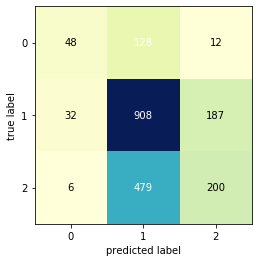

In [83]:
plot_confusion_matrix(cm, cmap='YlGnBu')
plt.show()

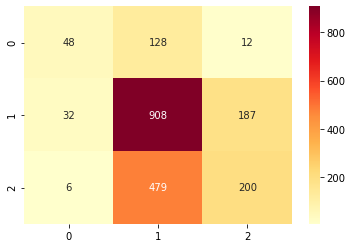

In [84]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='YlOrRd')
plt.show()

In [85]:
hgb.score(X_test,y_test)

0.578

In [86]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.56      0.26      0.35       188
           2       0.60      0.81      0.69      1127
           3       0.50      0.29      0.37       685

    accuracy                           0.58      2000
   macro avg       0.55      0.45      0.47      2000
weighted avg       0.56      0.58      0.55      2000



### Select Gradient Boosting Classifier and Histogram Gradient evaluation for Hyperparameter Tuning